<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MandelBrot" data-toc-modified-id="MandelBrot-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MandelBrot</a></span></li><li><span><a href="#Smoothed-version-of-the-mandelbrot" data-toc-modified-id="Smoothed-version-of-the-mandelbrot-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Smoothed version of the mandelbrot</a></span></li><li><span><a href="#Basic-MandelBrot-3d-surface" data-toc-modified-id="Basic-MandelBrot-3d-surface-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Basic MandelBrot 3d surface</a></span></li><li><span><a href="#MandelBrot-3d-surface-close-ups" data-toc-modified-id="MandelBrot-3d-surface-close-ups-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>MandelBrot 3d surface close ups</a></span></li><li><span><a href="#Close-up-of-the-mandelbrot" data-toc-modified-id="Close-up-of-the-mandelbrot-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Close up of the mandelbrot</a></span></li></ul></div>

# MandelBrot 

The code is taken from the book **'Make your own Mandelbrot'** by **Tariq Rashid**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import scipy.ndimage

Displaying the 3D figure via images - since the interactive 3D surface makes notebook very big

In [2]:
# from mayavi import mlab
# mlab.init_notebook(backend='x3d')

In [3]:
# mandelbrot function - takes the fixed parameter c and the maximum number of iterations maxiter as inputs

def mandel(c, maxiter):
    # starting value of complex number z is 0 + 0i before the iterations update it
    z = complex(0, 0)

    # start iterating and stop when it reaches maxiter times
    for iteration in range(maxiter):
        
        # the main function which generates the output value of z from the input values using the formula (z^2) + c 
        z = (z * z) + c
        
        # check if the (pythagorean) magnitude of the output complex number is greater than 4, if so stop iterating
        # as we've diverged already
        if abs(z) > 4:
            break
            
    # number of iterations (not the value of z), as this tells us how quickly the values diverged past the 
    # magnitude threshold of 4
    return iteration

In [4]:
def draw_mandel_at(xvalues, yvalues, const):
    # size of these lists of x and y values
    xlen = len(xvalues)
    ylen = len(yvalues)

    # # create an array of the right size to represent the atlas, we use the number of items in xvalues and yvalues
    atlas = np.empty([xlen, ylen])

    # go through each point in this atlas array and test to see how many
    # iterations are needed to diverge (or reach the maximum iterations
    # when not diverging)
    for ix in range(xlen):
        for iy in range(ylen):
            
            # at this point in the array, work out what the actual real
            # and imaginary parts of x are by looking it up in the xvalue and
            # yvalue lists
            cx = xvalues[ix]
            cy = yvalues[iy]
            c = complex(cx, cy)
        
            # # now we know what c is for this place in the atlas, apply
            # the mandel() function to return the number of iterations it took to
            # diverge

            atlas[ix, iy] = mandel(c, const)

    return atlas

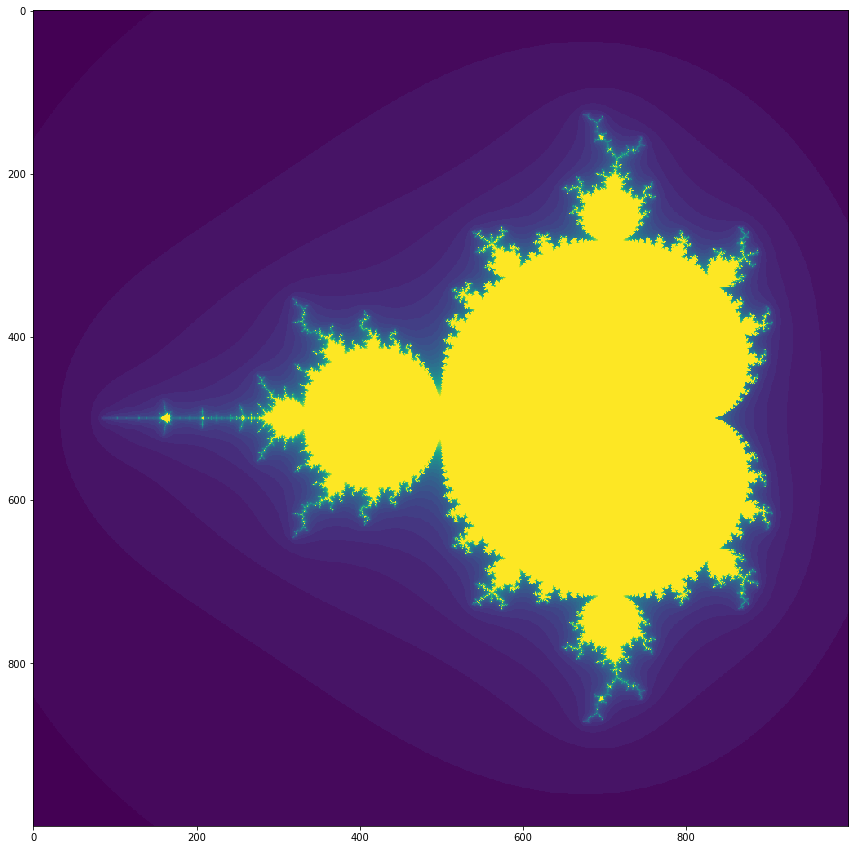

In [5]:
# set the location and size of the complex plane rectangle
xvalues = np.linspace(-2.25, 0.75, 1000)
yvalues = np.linspace(-1.5, 1.5, 1000)

atlas = draw_mandel_at(xvalues, yvalues, 40)

plt.figure(figsize=(15, 15))
    
# # plot the array atlas as an image, with its values represented as
# colours, peculiarity of python that we have to transpose the array
plt.imshow(atlas.T)

# Smoothed version of the mandelbrot 

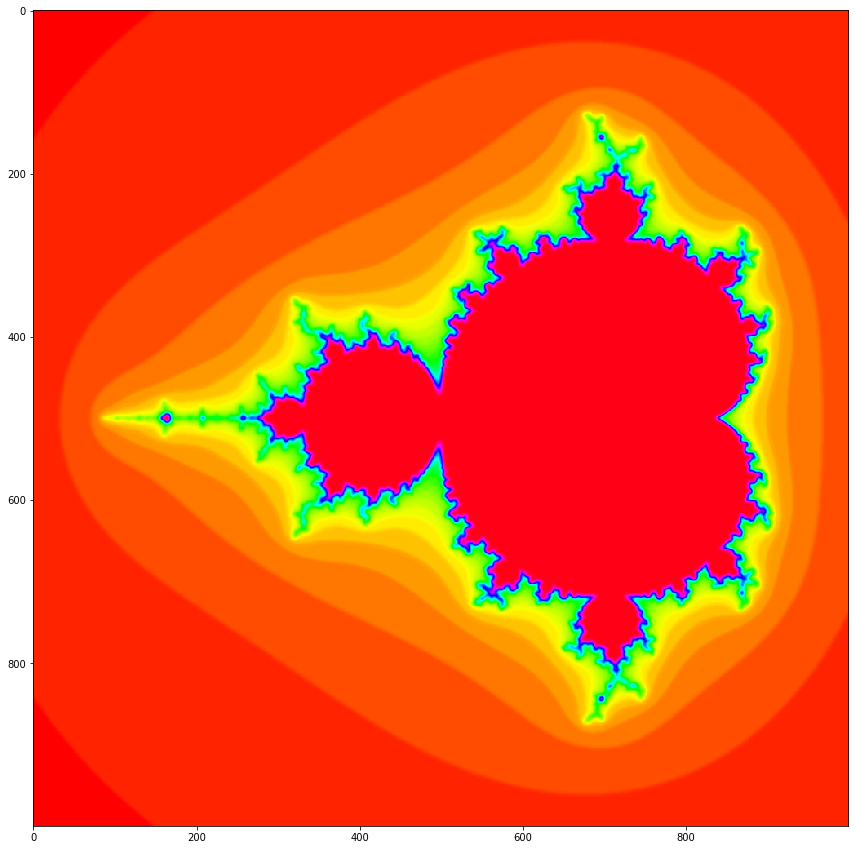

In [6]:
# set the figure size
plt.figure(figsize=(15, 15))

# create a smoothed image of the original by applying a Gaussian blur filter
smoothed_atlas = scipy.ndimage.gaussian_filter(atlas.T, 2)

# plot the array atlas as an image, with its values represented 
# as colours, peculiarity of python that we have to transpose the array
plt.imshow(smoothed_atlas, cmap='hsv')

**Not running the code below because it makes the file too big to push into git.** 
**Adding the pics to show the 3d images of the mandelbrot surface**

In [7]:
# set the figure size
# fig = mlab.figure(size=(480, 340))
# m = mlab.surf(smoothed_atlas.T, colormap='hsv', warp_scale=0.9, figure=fig)
# m

# Basic MandelBrot 3d surface

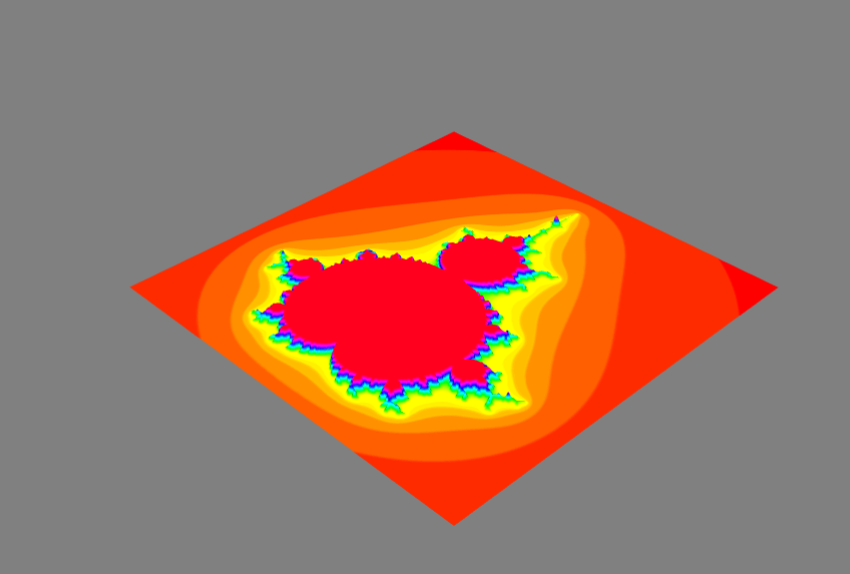

In [8]:
from IPython.display import Image
Image(filename='../mandel_imgs/mandelbrot_3_3d_0.PNG') 

# MandelBrot 3d surface close ups

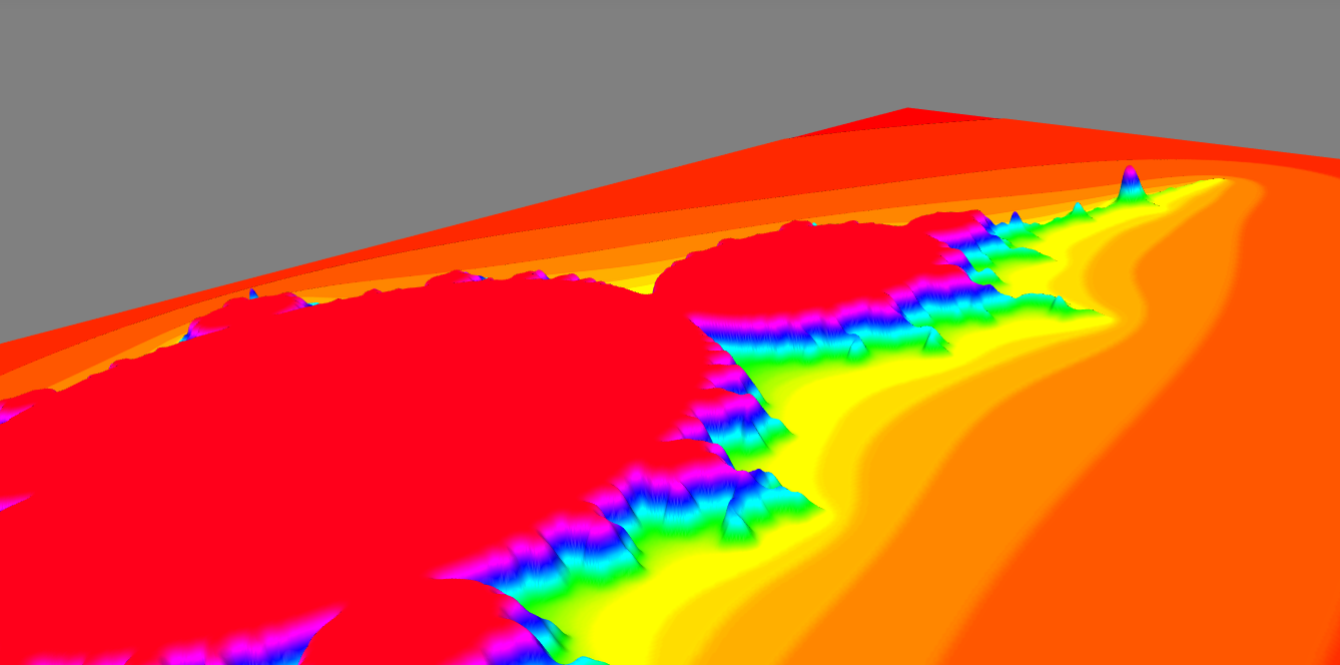

In [10]:
Image(filename='../mandel_imgs/mandelbrot_3_3d_1.PNG') 

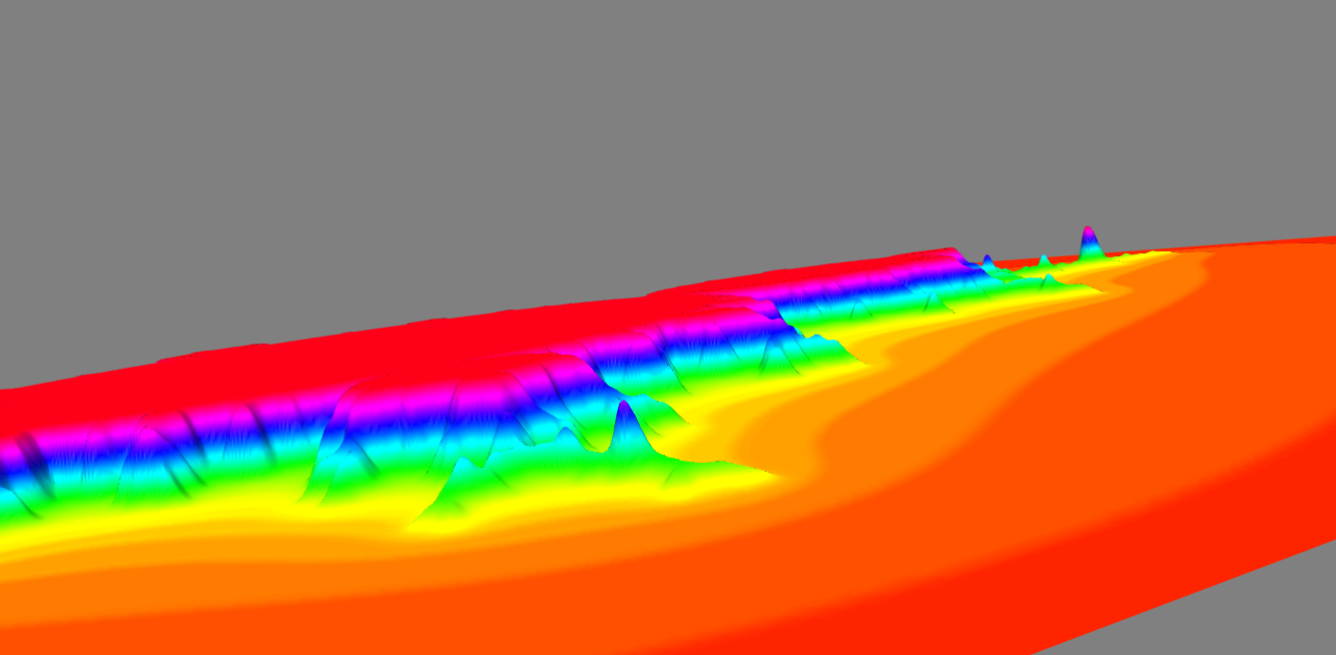

In [11]:
Image(filename='../mandel_imgs/mandelbrot_3_3d_3.PNG') 

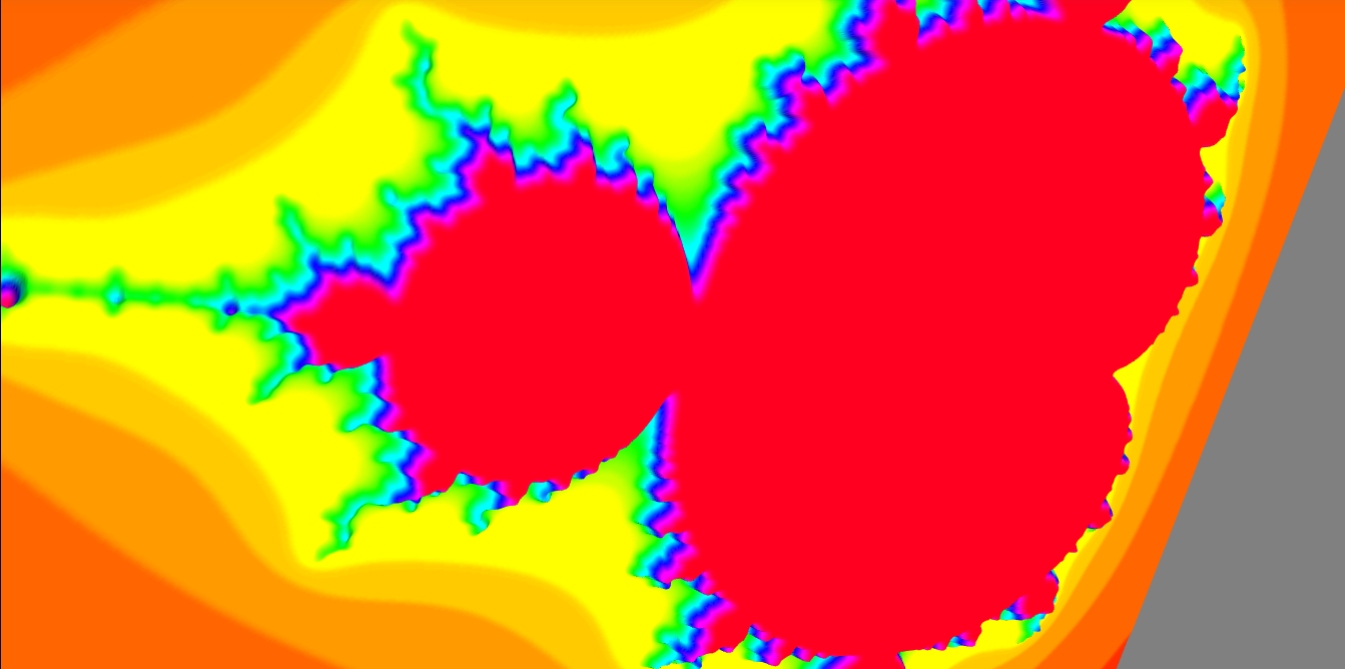

In [12]:
Image(filename='../mandel_imgs/mandelbrot_3_3d_4.PNG') 

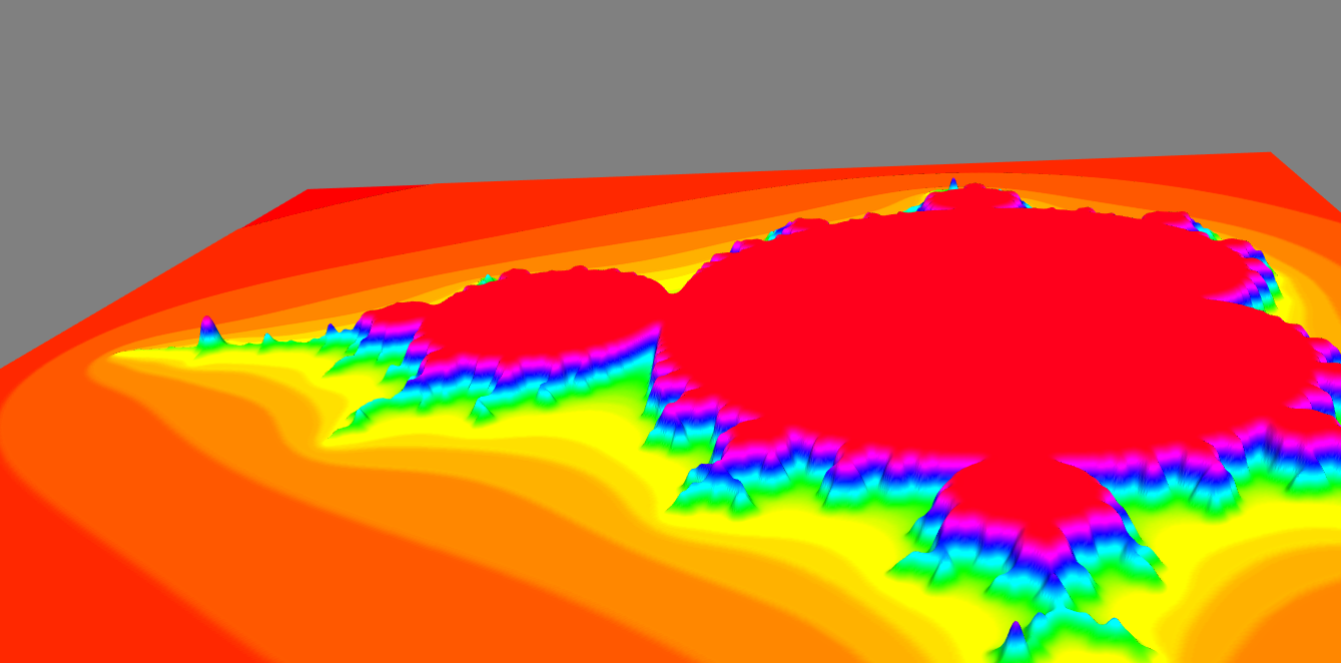

In [13]:
Image(filename='../mandel_imgs/mandelbrot_3_3d_5.PNG') 

# Close up of the mandelbrot

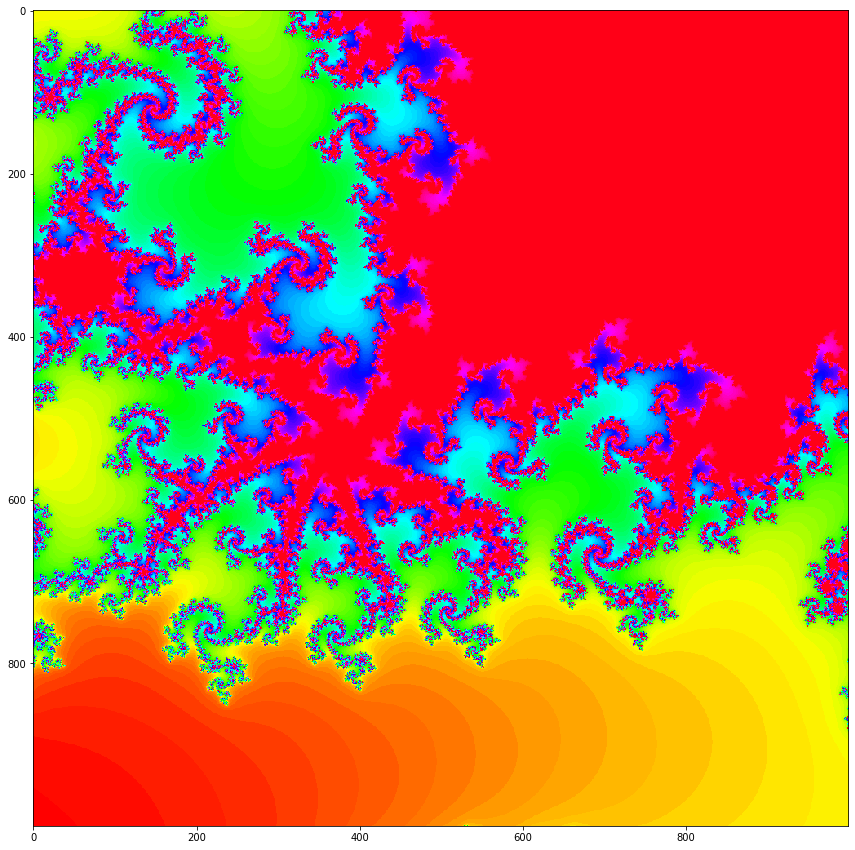

In [16]:
# set the location and size of the atlas rectangle
xvalues = np.linspace(-0.22, -0.21, 1000)
yvalues = np.linspace(-0.70, -0.69, 1000)

atlas = draw_mandel_at(xvalues, yvalues, 120)

plt.figure(figsize=(15, 15))
    
# # plot the array atlas as an image, with its values represented as
# colours, peculiarity of python that we have to transpose the array
plt.imshow(atlas.T, cmap='hsv')